In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import tikzplotlib
import numpy as np 
from pathlib import Path

import geopandas as gpd
import numpy as np
from shapely import box
from shapely import contains
from shapely import disjoint
from shapely import points

import pherosensor
from utils.plot_colormap import plot_colormap, plot_colormap_all_timestep

import os
import sys
os.chdir('../')
path_case = os.getcwd()
from gen_geom import geom

In [2]:
path_output_toy_case = path_case + '/output_direct_model'

In [3]:
msh = geom()
xv, yv = np.meshgrid(msh.x, msh.y, sparse=True, indexing="ij")

In [4]:
c_save = np.load(Path(path_output_toy_case) / f'c_save.npy')
t_save = np.load(Path(path_output_toy_case) / f't_save.npy')

In [5]:
path_data_toy_case = path_case + '/data'
S_value = np.load(Path(path_data_toy_case) / 'S_target.npy')[0,:,:]

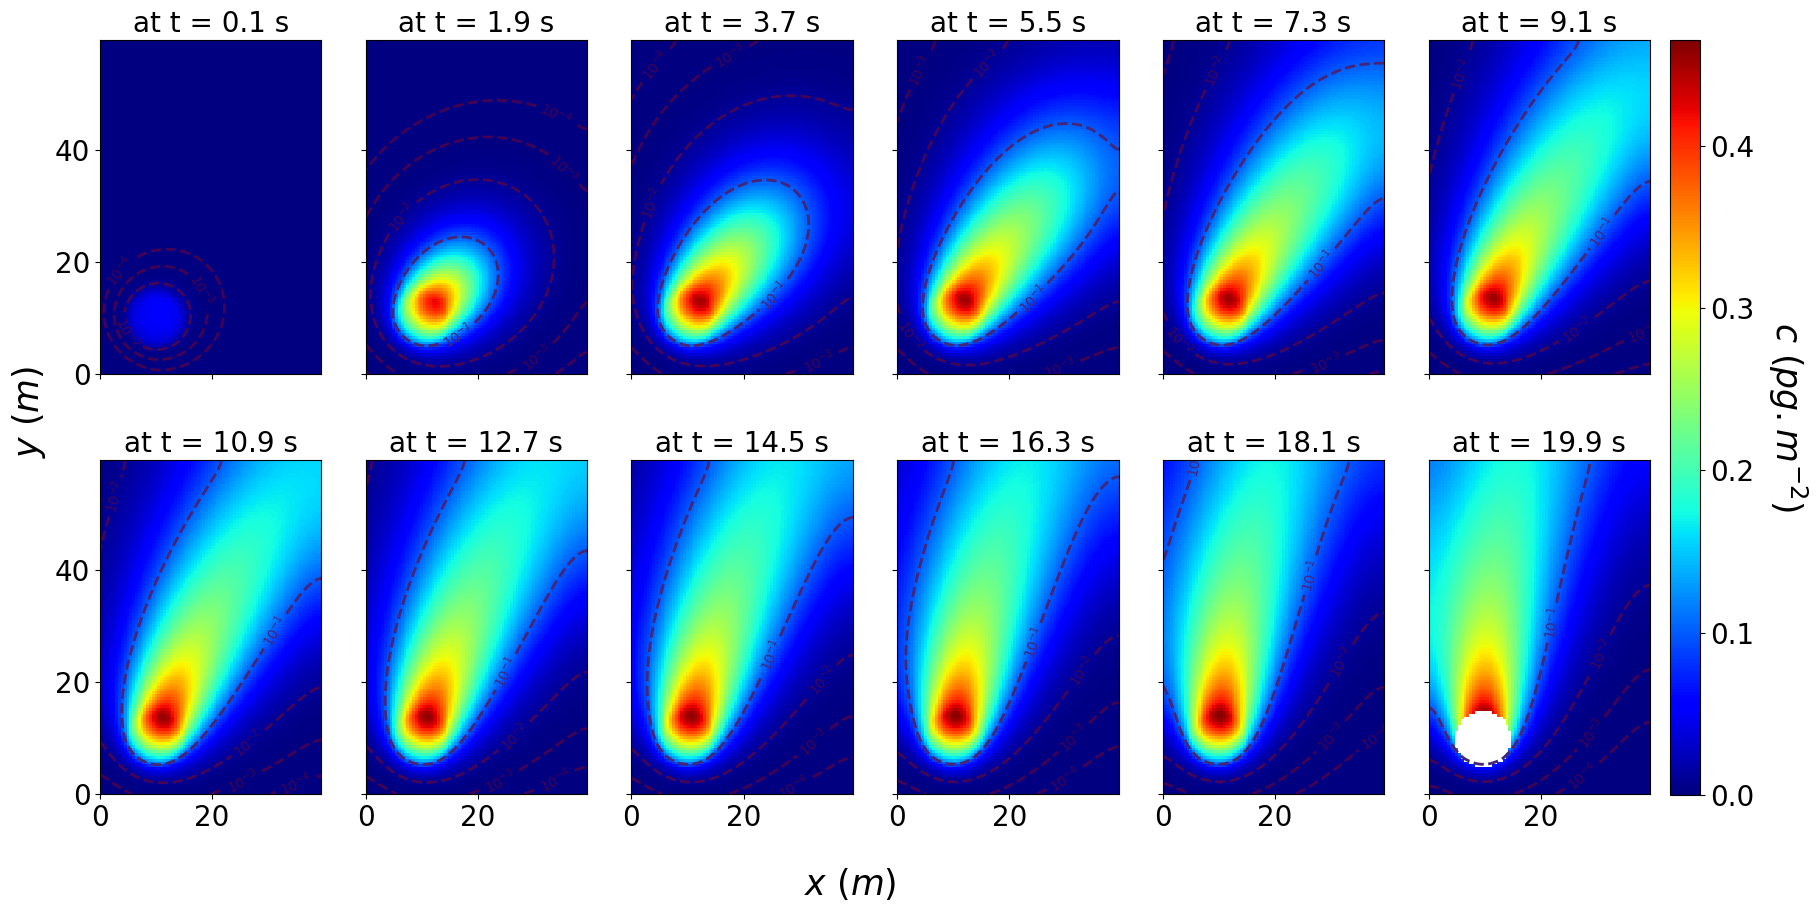

'\npath = \'./\'\nfile_name = \'c_target\'\nplt.savefig(Path(path) / f"{file_name}.png", format=\'png\', bbox_inches="tight")\n'

In [6]:
n_col = 6
n_ligne = t_save.size//n_col

fontsize=25

vmin = np.min(c_save)
vmax = np.max(c_save)
fig, axs = plt.subplots(n_ligne,n_col,figsize=(20,10), sharex=True, sharey=True)

for i in range(t_save.size):

    l = i//n_col
    c = i%n_col
    title = f'at t = {"{:.1f}".format(t_save[i])} s'
    fmt = ticker.LogFormatterMathtext()
    fmt.create_dummy_axis()
    levels = [10**(i) for i in [-4,-3,-2,-1,0]]
    c_plot = c_save[i,:,:]
    contour = axs[l,c].contour(msh.x-np.min(msh.x), msh.y-np.min(msh.y), c_plot, linestyles='dashed', levels=levels, linewidths=2)
    if i == t_save.size - 1: 
        c_plot[S_value>1.e-13] = np.nan
    axs[l,c].clabel(contour, inline=True, fontsize=10, fmt=fmt)
    pcmesh = axs[l,c].pcolormesh(xv[:, 0]-np.min(msh.x), yv[0, :]-np.min(msh.y), c_plot, cmap='jet', vmin=vmin, vmax=vmax)
    axs[l,c].set_aspect('equal', adjustable='box')
    axs[l,c].set_title(title, fontsize=fontsize - 5)
    axs[l,c].set_xticks([0,20,40])
    axs[l,c].set_yticks([0,20,40,60])
    axs[l,c].tick_params(labelsize=fontsize - 5)
    axs[l,c].set_xlim(0.,np.max(msh.x)-np.min(msh.x))
    axs[l,c].set_ylim(0.,np.max(msh.y)-np.min(msh.y))
    
fig.supxlabel('$x$ ($m$)', fontsize=fontsize)
fig.supylabel('$y$ ($m$)', fontsize=fontsize, x=0.08, y=0.5)
cbar_ax = fig.add_axes([0.91, 0.117, 0.015, 0.755])
cbar = fig.colorbar(pcmesh, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize - 5)
cbar.set_label('$c$ ($pg.m^{-2}$)', rotation=270, fontsize=fontsize, labelpad=40)
plt.show()

"""
path = './'
file_name = 'c_target'
plt.savefig(Path(path) / f"{file_name}.png", format='png', bbox_inches="tight")
"""